In [27]:
%matplotlib inline
import matplotlib as mpl
import scipy
import numpy as np
import pandas as pd
import itertools
from IPython.display import display
import doctest

# Jupyter Tips

## some useful magics

In [15]:
!ls

education.ipynb           sklearn_stats_class.ipynb web_scrapping.ipynb
profiling.ipynb           timeline.pdf


In [16]:
path = '/tmp'
!ls {path}

29samples-cut-join-deblur.log com.sangfor.lockcert
AlTest1.err                   com.sangfor.lockecagent
AlTest1.out                   local.job.err
US20190151377A1.pdf           local.job.out
adobegc.log                   powerlog
com.apple.launchd.Bg0SqEAbnV  sangfor.ec.rundata
com.apple.launchd.PiIW7KruJc  stop_easyconnect.sh
com.apple.launchd.cJ8oYftZcd  tmux-501
com.sangfor.ca.sha


In [21]:
?len

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [24]:
import gzip
gzip.s*?

gzip.struct
gzip.sys

In [32]:
%env RANDOM_ENV_VARIABLE=4

env: RANDOM_ENV_VARIABLE=4


In [33]:
%env

{'TMPDIR': '/var/folders/2x/jz5qtn5922lfzcnmjfd4hfwm0000gn/T/',
 'SHELL': '/bin/bash',
 'HOME': '/Users/zech',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.Bg0SqEAbnV/Listeners',
 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.PiIW7KruJc/Render',
 'LOGNAME': 'zech',
 'PATH': '/usr/bin:/bin:/usr/sbin:/sbin',
 'DBUS_LAUNCHD_SESSION_BUS_SOCKET': '/private/tmp/com.apple.launchd.cJ8oYftZcd/unix_domain_listener',
 'XPC_SERVICE_NAME': 'org.jupyter.lab',
 'USER': 'zech',
 'XPC_FLAGS': '0x0',
 'LC_CTYPE': 'UTF-8',
 'JPY_PARENT_PID': '61045',
 'TERM': 'xterm-color',
 'CLICOLOR': '1',
 'PAGER': 'cat',
 'GIT_PAGER': 'cat',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
 'RANDOM_ENV_VARIABLE': '4'}

Use LaTex for equations in markdown: $P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$

## jupyter output system
Notebooks are displayed as HTML and the cell output can be HTML, so you can return virtually anything: video/audio/images.

## multicursor support

Jupyter supports mutiple cursors, similar to Sublime Text. Simply click and drag your mouse while holding down `Alt`

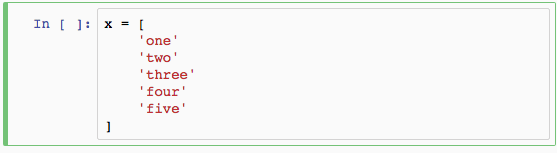

In [35]:
from IPython.display import display, Image
display(Image('multiline.gif'))

## Tell the notebook to save itself now
juputer notebook by default autosaves itself every 5 min or so if you haven’t changed the defaults.

But if you want to make sure the notebook is saved at the end of the run, you can just insert a new cell at the end of your notebook and make sure you run it:

In [26]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

## go to the executing cell

Add this snippet to the start of your notebook. Press Alt+I to find the cell being executed right now. This does not work if you have enabled vim bindings

In [25]:
%%javascript
// Go to Running cell shortcut
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('Alt-I', {
    help : 'Go to Running cell',
    help_index : 'zz',
    handler : function (event) {
        setTimeout(function() {
            // Find running cell and click the first one
            if ($('.running').length > 0) {
                //alert("found running cell");
                $('.running')[0].scrollIntoView();
            }}, 250);
        return false;
    }
});

<IPython.core.display.Javascript object>

## install packages from notebook

Running jupyter from an environment does NOT mean that the shell environment in `!` will have the same environment variables
Running `!pip install foo` (or `conda install bar`) will use the pip which is in the path for the `sh` shell which might be different from whatever bash shell environment you use. If you want to install a package while inside Jupyter and `!pip install foo` doesn't seem to do it, try:

````
!{sys.executable} -m pip install foo  # sys.executable points to the python that is running in your kernel
````


In [17]:
!which python

/usr/bin/python


In [18]:
import sys
!which {sys.executable}

/Users/zech/miniconda3/bin/python


## print every line's output

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
'a'
2+3

'a'

5

set back to print only the last line:

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [4]:
'a'
2+3

5

## markdown printing

In [8]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

printmd("**bold and blue**", color="blue")
printmd("_test_", color='red')

<span style='color:blue'>**bold and blue**</span>

<span style='color:red'>_test_</span>

## auto reload imports

The autoreload utility reloads modules automatically before entering the execution of code typed at the IPython prompt.

In [10]:
%load_ext autoreload
%autoreload 2 #set autoreload flag to 2. This reloads modules every time before executing the typed Python code

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## debug in notebook

In [7]:
def foobar(n):
    print('raise an exception:')
    raise ValueError('wrong value')
foobar(3)

raise an exception:


ValueError: wrong value

`%debug` in a new cell activates IPython Debugger and set the break point just before where the code breaks:

In [8]:
%debug

> <ipython-input-7-6fa6dc9e33f5>(3)foobar()
      1 def foobar(n):
      2     print('raise an exception:')
----> 3     raise ValueError('wrong value')
      4 foobar(3)



ipdb>  quit


You can also manually set break point:

In [9]:
from IPython.core.debugger import set_trace

def foobar(n):
    x = 1337
    y = x + n
    set_trace() #this one triggers the debugger
    return y

foobar(3)

> <ipython-input-9-b81ddc5d52ce>(7)foobar()
      5     y = x + n
      6     set_trace() #this one triggers the debugger
----> 7     return y
      8 
      9 foobar(3)



ipdb>  list


      2 
      3 def foobar(n):
      4     x = 1337
      5     y = x + n
      6     set_trace() #this one triggers the debugger
----> 7     return y
      8 
      9 foobar(3)



ipdb>  quit


BdbQuit: 

## save the code block to a file

In [2]:
%%writefile -a /tmp/c.py
print('hello')

Appending to /tmp/c.py


## Suppress the output of a final function

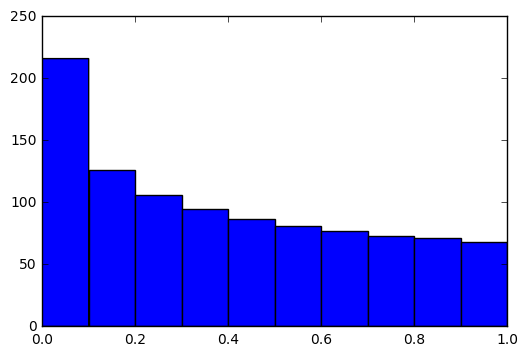

In [18]:
from matplotlib import pyplot as plt
import numpy
x = numpy.linspace(0, 1, 1000)**1.5
plt.hist(x);  # use semicolon to suppress the output of last statement

In [1]:
import pandas as pd
import numpy as np

def swap_col(df, col1, col2=None):
    cols = df.columns.tolist()
    if col2 is None:
        a = cols.index(col1)
        b = len(cols) - 1
    else:
        a, b = cols.index(col1), cols.index(col2)
    cols[b], cols[a] = cols[a], cols[b]
    return df[cols]

In [ ]:
df = pd.DataFrame()

In [33]:
def my_fun():
    '''
    >>> 2 + 3
    5
    '''
    pass

import doctest
doctest.testmod()

TestResults(failed=0, attempted=9)

In [32]:
def plot_with_errorbar(x, y, xerror=None, yerror=None):
    '''
    Parameters
    ----------
    x, y : array-like
    xerror, yerror : callable to calculate errors

    Examples
    --------
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt

    >>> x = np.arange(0.1, 4, 0.5)
    >>> y = np.exp(-x)
    >>> xerror = 0.1 + 0.2 * x
    >>> lower_error = 0.4 * error
    >>> upper_error = error
    >>> yerror = [lower_error, upper_error]
    >>> plot_with_errorbar(x, y, xerror, yerror)  # doctest: +SKIP
    '''
    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=xerror, yerr=yerror)
    return fig

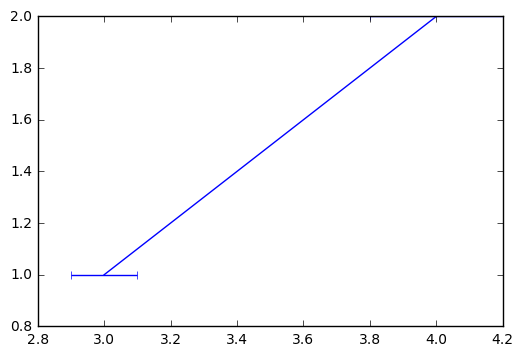

In [27]:
error = 0.1
x = [3,4]
y = [1,2]
xerror = [0.1, 0.2]
lower_error = 0.4 * error
upper_error = error
yerror = [lower_error, upper_error]
plot_with_errorbar(x, y, xerror);

# Emails

## Send email thru sendmail

In [3]:
from email.mime.text import MIMEText
from subprocess import Popen, PIPE

msg = MIMEText("Here is the body of my message")
msg["From"] = "me@example.com"
msg["To"] = "zhenjiang.xu@gmail.com"
msg["Subject"] = "This is the subject."
p = Popen(["/usr/sbin/sendmail", "-t", "-oi"], stdin=PIPE)
p.communicate(msg.as_bytes())

(None, None)

## Send email thru SMTP

In [ ]:
import smtplib

sender = 'not.to.miss@gmail.com'
receivers = ['zhenjiang.xu@gmail.com']

message = """From: From Person <from@fromdomain.com>
To: To Person <to@todomain.com>
Subject: SMTP e-mail test

This is a test e-mail message.
"""

try:
   smtpObj = smtplib.SMTP('localhost')
   smtpObj.sendmail(sender, receivers, message)         
   print("Successfully sent email")
except SMTPException:
   print("Error: unable to send email")

# Plotting

## plot timeline

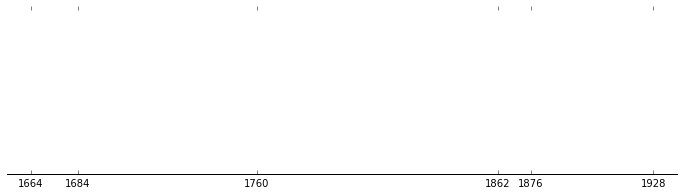

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)
pad = 10
years = [1664, 1684, 1862, 1876, 1760, 1928]
ax.yaxis.set_visible(False)
ax.xaxis.set_ticks(years)
ax.set_xlim(min(years) - pad, max(years) + pad)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [14]:
fig.savefig('/tmp/timeline.pdf', figsize=(8, 64))

## plot annotations

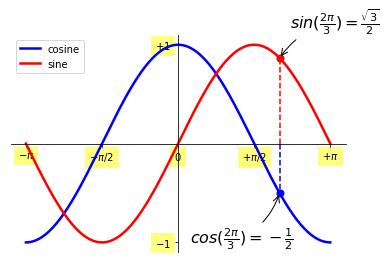

In [54]:
fig, ax = plt.subplots()

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C = np.cos(X)
S = np.sin(X)

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlim(X.min() * 1.1, X.max() * 1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_ylim(C.min() * 1.1, C.max() * 1.1)
ax.set_yticks([-1, +1])
ax.set_yticklabels([r'$-1$', r'$+1$'])

t = 2*np.pi/3
ax.plot([t, t], [0, np.cos(t)], color='blue', linewidth=1.5, linestyle="--")
ax.scatter([t, ], [np.cos(t), ], 50, color='blue')
ax.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)),
            xycoords='data',
            xytext=(+10, +30),
            textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

ax.plot([t, t], [0, np.sin(t)], color='red', linewidth=1.5, linestyle="--")
ax.scatter([t, ], [np.sin(t), ], 50, color='red')
ax.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
            xy=(t, np.cos(t)),
            xycoords='data',
            xytext=(-90, -50),
            textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
for label in ax.get_xticklabels() + ax.get_yticklabels():
    #label.set_fontsize(16)
    label.set_bbox(dict(facecolor='yellow', edgecolor='None', alpha=0.5))
ax.legend(loc='upper left')

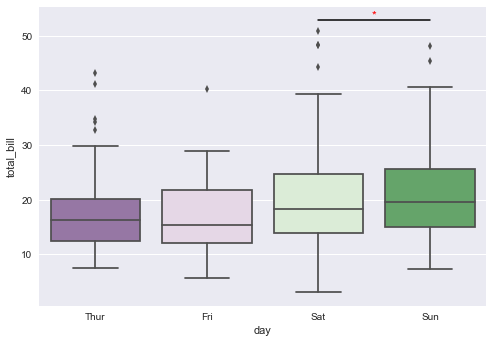

In [89]:
import seaborn as sns, matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")

# statistical annotation
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = tips['total_bill'].max() + 2, 2, 'k'
plt.plot([x1, x2], [y, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y, "*", ha='center', va='bottom', color='red')

/Users/zech/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


([<matplotlib.axis.XTick at 0x1a269eb780>,
 <a list of 4 Text xticklabel objects>)

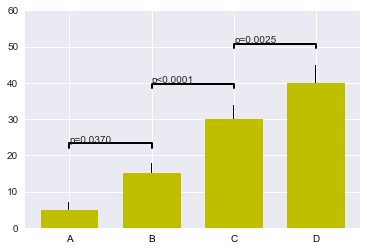

In [118]:
import matplotlib.pyplot as plt
menMeans   = (5, 15, 30, 40)
menStd     = (2, 3, 4, 5)
ind  = np.arange(4)    # the x locations for the groups
width= 0.7
labels = ('A', 'B', 'C', 'D')

# Pull the formatting out here
bar_kwargs = {'width':width,'color':'y','linewidth':2,'zorder':5}
err_kwargs = {'zorder':0,'fmt':None,'linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)


# Custom function to draw the diff bars

def label_diff(i,j,text,X,Y):
    #x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

# Call the function
label_diff(0,1,'p=0.0370',ind,menMeans)
label_diff(1,2,'p<0.0001',ind,menMeans)
label_diff(2,3,'p=0.0025',ind,menMeans)


plt.ylim(ymax=60)
plt.xticks(ind, labels, color='k')

In [ ]:
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',
             'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

In [19]:
import scipy

In [30]:
def plot_box(x, y, title='', ax=None):
    '''Plot box plot.
    '''
    if ax is None:
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots()

    uniq = np.unique(x)
    values = [y[x==i] for i in uniq]
    idx = np.argsort([max(i) for i in values])
    uniq = uniq[idx]
    values = [values[i] for i in idx]
    ax.boxplot(values, labels=uniq)
    for i, j in itertools.combinations(range(len(uniq)), 2):
        y1 = values[i]
        y2 = values[j]
        test = scipy.stats.ttest_ind(y1, y2, equal_var=False)
        if test.pvalue < 0.01:
            s = '**'
        elif test.pvalue < 0.05:
            s = '*'
        else:
            continue
        height = max(y1.max(), y2.max()) * 1.05
        ax.plot([i+1, j+1], [height, height], lw=1.5, c='black')
        ax.text((i + j + 2) / 2, height, s, ha='center', va='bottom', color='red')        
        
    # ax.annotate("r={0:.2f} p={1:.3f}".format(r, p), xy=(.1, .95), xycoords=ax.transAxes)
    ax.set_title(title)
    return ax

(0, 8)

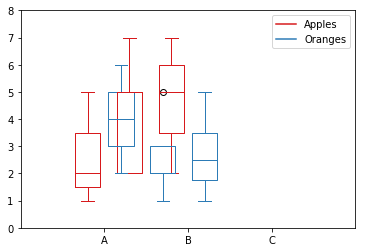

In [51]:
data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2-0.4, widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
#plt.tight_layout()

In [46]:
def boxplot(x_data, y_data, base_color="#539caf", median_color="#297083", x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [44]:
np.random.seed(10)
y = np.concatenate([np.random.normal(10, 10, 25), np.random.normal(30, 10, 25)])
x = np.array(['a']*20 + ['b']*20 + ['c']*10)

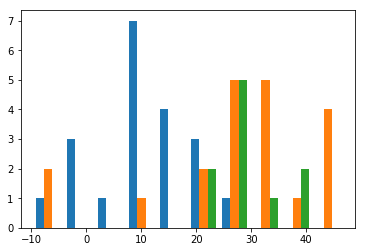

In [45]:
plot_hist(x, y)

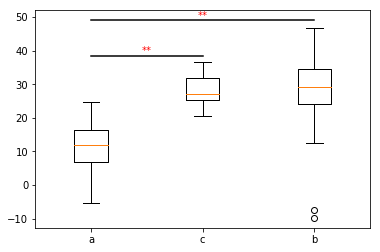

In [32]:
plot_box(x, y)

In [25]:
fig.clear()

you can close a figure programmatically by calling close. Depending on the argument it closes (1) the current figure (no argument), (2) a specific figure (figure number or figure instance as argument), or (3) all figures ("all" as argument).

In [26]:
plt.close('all')

# Language processing

Here's something I found: Text Mining Online | Text Analysis Online | Text Processing Online which was published by Stanford.

This seems to be an adder to the existing NLTK pacakge. You need to download it and put it at an appropriate location in NLTK package and reinstall to use.

This is a sentence segmenter add-on, which can be used to tokenize Chinese sentences. This can be rather a difficult job because not like English where words a separated by a space, Chinese characters for a sentence is just a chunk of characters.

An example demo for this package is:

In [ ]:
>>> from nltk.tokenize.stanford_segmenter import StanfordSegmenter
>>> segmenter = StanfordSegmenter(path_to_jar=”stanford-segmenter-3.4.1.jar”, path_to_sihan_corpora_dict=”./data”, path_to_model=”./data/pku.gz”, path_to_dict=”./data/dict-chris6.ser.gz”)
>>> sentence = u”这是斯坦福中文分词器测试”
>>> segmenter.segment(sentence)
>>> u’\u8fd9 \u662f \u65af\u5766\u798f \u4e2d\u6587 \u5206\u8bcd\u5668 \u6d4b\u8bd5\n’
>>> segmenter.segment_file(“test.simp.utf8”)
>>> u’\u9762\u5bf9 \u65b0 \u4e16\u7eaa \uff0c \u4e16\u754c \u5404\u56fd .
>>> outfile = open(‘outfile’, ‘w’)
>>> result = segmenter.segment(sentence)
>>> outfile.write(result.encode(‘UTF-8′))
>>> outfile.close()

# sigmoid fit

In [ ]:
# good discussion here:  http://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc
# curve_fit() example from here: http://permalink.gmane.org/gmane.comp.python.scientific.user/26238
# other sigmoid functions here: http://en.wikipedia.org/wiki/Sigmoid_function

import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

# Unit Tests in notebook

In [11]:
from unittest import TestCase

class DefaultTest(TestCase):
    def test_a(self):
        self.assertTrue(True)
        
class SecondTest(TestCase):
    def test_b(self):
        self.assertEqual(0, 0)

In [12]:
# adapted from http://amodernstory.com/2015/06/28/running-unittests-in-the-ipython-notebook/
from unittest import TestLoader, TextTestRunner

test_loader = TestLoader()
runner = TextTestRunner()

tests = (DefaultTest, SecondTest)

for testcase in tests:
    suite = test_loader.loadTestsFromModule(testcase())
    runner.run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

# Time

In [21]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import num2date

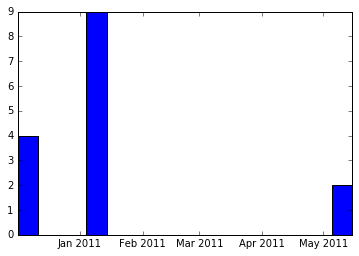

In [23]:
x = [datetime(2010, 12, 1, 10, 0),
     datetime(2011, 1, 4, 9, 0),
     datetime(2011, 5, 5, 9, 0)]
y = [4, 9, 2]

ax = plt.subplot(111)
ax.bar(x, y, width=10)
ax.xaxis_date()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import num2date

# interval width
nhours = 24

# convert datetime instances in `x` to hours since reference date
numtime = date2num(x)/24.

# bins for histogram
bins = np.arange(numtime.min(), numtime.max()+1, nhours)

# plotting the histogram
fig, ax = plt.subplots()
ax.hist(numtime, bins=bins, alpha=.5)

# Context Manager

In [34]:
class Foo:
    def __init__(self, x=0):
        self.x = x
        print('Init')

    def __enter__(self, x=1):
        print('Enter with {x}'.format(x=x))
        return x

    def __exit__(self, exc_type, exc_value, traceback):
        print('Exit')
        if exc_type is ValueError:
            print('There is a ValueError')
            print(type(exc_value))
            return True

    def get(self):
        print('Run get')
        return self.x


In [35]:
a = Foo(3)
b = a.__exit__(None, None, None)

Init
Exit


In [36]:
repr(b)

'None'

In [37]:
c = a.__enter__(2)

Enter with 2


In [38]:
with Foo(3) as f:
    print(f)

Init
Enter with 1
1
Exit


In [39]:
with Foo(3) as f:
    raise ValueError
    print(f)

Init
Enter with 1
Exit
There is a ValueError
<class 'ValueError'>


In [40]:
with Foo(3) as f:
    raise ZeroDivisionError
    print(f)

Init
Enter with 1
Exit


ZeroDivisionError: 

# Run doctest

In [28]:
doctest.testmod()

TestResults(failed=0, attempted=0)